In [7]:
import pandas as pd
import warnings
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score



In [ ]:
# ЗАВДАННЯ 1:  Повнозв'язані нейронні мережі

In [8]:
warnings.filterwarnings('ignore')
#Датасет з першої лаби
df = pd.read_csv("D:\\AD labs\\lala\\Machine_learning_labs\\new_model.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


In [13]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [14]:
# Побудова MLP
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Навчання
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)

# Тестування
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"MLP Test accuracy: {accuracy:.3f}")


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5625 - loss: 0.6830 - val_accuracy: 0.7500 - val_loss: 0.6392
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - loss: 0.5643 - val_accuracy: 0.8438 - val_loss: 0.5349
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9062 - loss: 0.4687 - val_accuracy: 0.8750 - val_loss: 0.4411
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9258 - loss: 0.3845 - val_accuracy: 0.9219 - val_loss: 0.3596
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9453 - loss: 0.3128 - val_accuracy: 0.9531 - val_loss: 0.2886
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9531 - loss: 0.2535 - val_accuracy: 0.9531 - val_loss: 0.2319
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9609 - loss: 0.2071 - val_accuracy: 0.9531 - val_loss: 0.1898
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9648 - loss: 0.1723 - val_accuracy: 0.9531 - val_loss

In [ ]:
#Під час навчання моделі було помічено, що після приблизно 35 епох точність та значення функції втрат практично не змінюються, 
# що свідчить про досягнення збіжності.

In [ ]:
"""
Повнозв’язана нейронна мережа MLP показала точність 0.95 на тестовій вибірці. Інші класичні алгоритми, такі як SVM та 
Рандом Форест, досягли трохи вищої точності (~0.97–0.98) в першій лабі. 
Це й не дивно, Це пояснюється обмеженим розміром даних та тим, що для невеликих табличних датасетів класичні методи часто більш ефективні.
"""

In [ ]:
#ЗАВДАННЯ 2: Згорткові нейронні мережі

In [ ]:
# 2а.Побудуйте просту згорткову нейронну мережу

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tensorflow.keras import layers


In [21]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder(
    root="data/train",
    transform=transform
)

val_dataset = datasets.ImageFolder(
    root="data/val",
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [22]:

class SimpleCNN(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()

        self.conv1 = layers.Conv2D(32, (3,3), activation='relu', padding='same')
        self.pool1 = layers.MaxPooling2D((2,2))

        self.conv2 = layers.Conv2D(64, (3,3), activation='relu', padding='same')
        self.pool2 = layers.MaxPooling2D((2,2))

        self.conv3 = layers.Conv2D(128, (3,3), activation='relu', padding='same')
        self.pool3 = layers.MaxPooling2D((2,2))

        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(256, activation='relu')
        self.out = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = self.flatten(x)
        x = self.fc1(x)
        return self.out(x)


In [39]:

IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = "flowers"

train_ds = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

normalization = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization(x), y))
val_ds = val_ds.map(lambda x, y: (normalization(x), y))


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [31]:
num_classes = 5

model = SimpleCNN(num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)
loss, acc = model.evaluate(val_ds)
print(f"Validation accuracy: {acc*100:.2f}%")


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3995 - loss: 1.3789 - val_accuracy: 0.4774 - val_loss: 1.1571
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5617 - loss: 1.0737 - val_accuracy: 0.5666 - val_loss: 1.0111
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6213 - loss: 0.9570 - val_accuracy: 0.5794 - val_loss: 1.0207
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6705 - loss: 0.8409 - val_accuracy: 0.6582 - val_loss: 0.8191
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7169 - loss: 0.7390 - val_accuracy: 0.6396 - val_loss: 0.8657
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7649 - loss: 0.6181 - val_accuracy: 0.6489 - val_loss: 0.9410
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8054 - loss: 0.5080 - val_accuracy: 0.6918 - val_loss: 0.9571
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8593 - loss: 0.3866 - val_accu

In [34]:
#2.б) Використайте попередньо натреновану архітектуру (наприклад, ResNet, VGG, MobileNet). Замініть вихідний класифікатор
#на новий під ваші класи. Проведіть донавчання моделі на вашому датасеті. Порівняйте результати 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [35]:
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(64, 64, 3)
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

loss, acc = model.evaluate(val_ds)
print(f"Transfer Learning Accuracy: {acc*100:.2f}%")

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.3790 - loss: 1.4954 - val_accuracy: 0.3951 - val_loss: 1.4951
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.3871 - loss: 1.4726 - val_accuracy: 0.4114 - val_loss: 1.4817
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.3946 - loss: 1.4570 - val_accuracy: 0.4171 - val_loss: 1.4625
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.4013 - loss: 1.4411 - val_accuracy: 0.4229 - val_loss: 1.4532
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.4085 - loss: 1.4302 - val_accuracy: 0.4206 - val_loss: 1.4378
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.4094 - loss: 1.4188 - val_accuracy: 0.4218 - val_loss: 1.4283
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.4192 - loss: 1.4084 - val_accuracy: 0.4218 - val_loss: 1.4320
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.4195 - loss: 1.4001 

In [ ]:
#

In [ ]:
#Завдання 3: Вирішіть задачу класифікації текстів

In [ ]:
# 3.a а) Побудуйте модель з вбудованим Embedding шаром (ініціалізованим випадковими вагами)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf

vocab_size = 10000
max_len = 200
embedding_dim = 100
batch_size = 32
epochs = 7


In [7]:
data = pd.read_csv("C:\\Users\\User\\Downloads\\df_file.csv",
                   sep=",", header=0,
    names=['text', 'label'])
data['text'] = data['text'].astype(str).str.replace('\n', ' ', regex=True) #очищуємо текст від зайвих згнаків переносу строки
data['text'] = data['text'].str.replace(r'\s+', ' ', regex=True).str.strip() #очищуємо текст від зайвих пробілів

print(data.head())


texts = data['text'].astype(str).values
labels = data['label'].values


le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
num_classes = len(le.classes_)

texts_train, texts_test, y_train, y_test = train_test_split(
    texts, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)


                                                text  label
0  Budget to set scene for election Gordon Brown ...      0
1  Army chiefs in regiments decision Military chi...      0
2  Howard denies split over ID cards Michael Howa...      0
3  Observers to monitor UK election Ministers wil...      0
4  Kilroy names election seat target Ex-chat show...      0


In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(texts_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(texts_test), maxlen=max_len)


In [13]:
model_random = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(128),
    Dense(num_classes, activation='softmax')
])

model_random.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_random = model_random.fit(
    X_train_seq, y_train, 
    epochs=epochs, batch_size=batch_size, 
    validation_data=(X_test_seq, y_test)
)

# Оцінка
y_pred_random = np.argmax(model_random.predict(X_test_seq), axis=1)
print("Classification Report (Random Embeddings):")
print(classification_report(y_test, y_pred_random, target_names=[str(c) for c in le.classes_]))



Epoch 1/5


D:\conda\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3180 - loss: 1.5029 - val_accuracy: 0.4404 - val_loss: 1.2432
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5421 - loss: 1.0904 - val_accuracy: 0.5955 - val_loss: 0.9350
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7275 - loss: 0.7953 - val_accuracy: 0.6202 - val_loss: 0.9316
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9096 - loss: 0.3715 - val_accuracy: 0.8382 - val_loss: 0.5041
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9528 - loss: 0.2070 - val_accuracy: 0.7775 - val_loss: 0.6646
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
Classification Report (Random Embeddings):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        84
           1       0.90      0.93      0.91       102
           2       0.70      0.80      0.74        80
           3       0.74      0.82      0.78        77
           4       0.83  

In [14]:
# 3.б) Завантажте готові embeddings (наприклад, GloVe)
embedding_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.array(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Створення матриці для Embedding шару
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector


In [15]:
model_glove = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128),
    Dense(num_classes, activation='softmax')
])

model_glove.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_glove = model_glove.fit(
    X_train_seq, y_train, 
    epochs=epochs, batch_size=batch_size, 
    validation_data=(X_test_seq, y_test)
)

# Оцінка
y_pred_glove = np.argmax(model_glove.predict(X_test_seq), axis=1)
print("Classification Report (GloVe Embeddings):")
print(classification_report(y_test, y_pred_random, target_names=[str(c) for c in le.classes_]))



Epoch 1/5


D:\conda\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5826 - loss: 1.0902 - val_accuracy: 0.5933 - val_loss: 0.9668
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7180 - loss: 0.7982 - val_accuracy: 0.8022 - val_loss: 0.6737
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8219 - loss: 0.5606 - val_accuracy: 0.8449 - val_loss: 0.5633
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8253 - loss: 0.5664 - val_accuracy: 0.8472 - val_loss: 0.5385
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8253 - loss: 0.5718 - val_accuracy: 0.7753 - val_loss: 0.7410
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Classification Report (GloVe Embeddings):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        84
           1       0.90      0.93      0.91       102
           2       0.70      0.80      0.74        80
           3       0.74      0.82      0.78        77
           4       0.83   

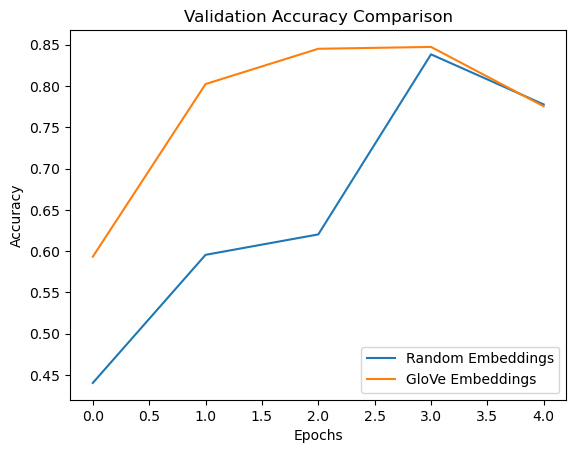

In [16]:
import matplotlib.pyplot as plt

# Графік точності
plt.plot(history_random.history['val_accuracy'], label='Random Embeddings')
plt.plot(history_glove.history['val_accuracy'], label='GloVe Embeddings')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
"""
Використання pretrained embeddings (GloVe) дало швидший старт і стабільніше навчання.
Пікова точність на тесті в обох випадках приблизно однакова (0.84–0.85), але GloVe дозволяє досягти цієї точності вже на 3-й 
епосі, тоді як Random embeddings після 5 епох.
"""